In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats

plt.rcParams['figure.figsize'] = (18, 10)
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.grid'] = True

In [2]:
data = pd.read_csv('Nutrition_Value_Dataset.csv')
data

,Company,Category,Product,Per Serve Size,Energy (kCal),Carbohydrates (g),Protein (g),Fiber (g),Sugar (g),Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg)
0,Pizza Hut,All Meals,Corn n Cheese (Personal),143.5 g,432.60,65.64,17.91,3.85,0.0,10.93,5.14,0.16,16.19,499.72
1,Pizza Hut,All Meals,Country Feast (Personal),178 g,407.60,67.11,16.73,7.19,0.0,8.03,3.24,0.11,66.80,818.00
2,Pizza Hut,All Meals,Double Cheese (Personal),143 g,423.33,59.97,18.26,3.49,0.0,12.27,5.23,0.18,19.75,638.22
3,Pizza Hut,All Meals,Double Paneer Supreme (Personal),174.5 g,474.03,52.86,20.07,3.79,0.0,20.26,9.25,0.33,71.72,1128.11
4,Pizza Hut,All Meals,Farmer`s Pick (Personal),177 g,408.16,53.93,19.91,2.46,0.0,12.53,4.90,0.14,48.09,942.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Dominos,All Meals,CHICKEN WINGS,174.0,352.90,24.50,35.30,5.76,10.4,12.60,4.80,0.19,308.70,NaN
526,Dominos,All Meals,CRISPY CHICKEN STRIPS,156.0,461.20,51.30,26.70,5.16,3.6,13.90,4.30,0.17,713.07,NaN
527,Dominos,All Meals,ZINGY PARCEL CHICKEN,210.0,667.50,17.30,19.20,16.92,10.6,31.30,14.10,0.56,541.49,NaN
528,Dominos,All Meals,TACO MEXICANA - CHICKEN,97.0,322.60,34.20,9.30,5.40,3.9,16.50,4.50,0.18,564.30,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            530 non-null    object 
 1   Category           530 non-null    object 
 2   Product            530 non-null    object 
 3   Per Serve Size     530 non-null    object 
 4   Energy (kCal)      530 non-null    float64
 5   Carbohydrates (g)  530 non-null    float64
 6   Protein (g)        530 non-null    float64
 7   Fiber (g)          530 non-null    float64
 8   Sugar (g)          530 non-null    float64
 9   Total Fat (g)      530 non-null    float64
 10  Saturated Fat (g)  530 non-null    float64
 11  Trans Fat (g)      530 non-null    float64
 12  Cholesterol (mg)   530 non-null    float64
 13  Sodium (mg)        443 non-null    float64
dtypes: float64(10), object(4)
memory usage: 58.1+ KB


# Data Cleaning

In [4]:
#Lowercase columns name
data.columns = data.columns.str.strip().str.lower()

#Convert first 3 columns in strings and lowercase the values
data.iloc[:,[0,1,2]] = data.iloc[:,[0,1,2]].astype(str)

for i in range(3):
    data.iloc[:,i] = data.iloc[:,i].str.lower()
data

,company,category,product,per serve size,energy (kcal),carbohydrates (g),protein (g),fiber (g),sugar (g),total fat (g),saturated fat (g),trans fat (g),cholesterol (mg),sodium (mg)
0,pizza hut,all meals,corn n cheese (personal),143.5 g,432.60,65.64,17.91,3.85,0.0,10.93,5.14,0.16,16.19,499.72
1,pizza hut,all meals,country feast (personal),178 g,407.60,67.11,16.73,7.19,0.0,8.03,3.24,0.11,66.80,818.00
2,pizza hut,all meals,double cheese (personal),143 g,423.33,59.97,18.26,3.49,0.0,12.27,5.23,0.18,19.75,638.22
3,pizza hut,all meals,double paneer supreme (personal),174.5 g,474.03,52.86,20.07,3.79,0.0,20.26,9.25,0.33,71.72,1128.11
4,pizza hut,all meals,farmer`s pick (personal),177 g,408.16,53.93,19.91,2.46,0.0,12.53,4.90,0.14,48.09,942.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,dominos,all meals,chicken wings,174.0,352.90,24.50,35.30,5.76,10.4,12.60,4.80,0.19,308.70,NaN
526,dominos,all meals,crispy chicken strips,156.0,461.20,51.30,26.70,5.16,3.6,13.90,4.30,0.17,713.07,NaN
527,dominos,all meals,zingy parcel chicken,210.0,667.50,17.30,19.20,16.92,10.6,31.30,14.10,0.56,541.49,NaN
528,dominos,all meals,taco mexicana - chicken,97.0,322.60,34.20,9.30,5.40,3.9,16.50,4.50,0.18,564.30,NaN


In [5]:
#Drop Sodium column
data.drop('sodium (mg)', axis=1, inplace=True)

# EDA

### Numeric Columns

In [6]:
numeric_cols = data.select_dtypes(include=['float']).columns
num_df = data.loc[:,numeric_cols]
num_df.describe()

,energy (kcal),carbohydrates (g),protein (g),fiber (g),sugar (g),total fat (g),saturated fat (g),trans fat (g),cholesterol (mg)
count,530.000000,530.000000,530.000000,530.0000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,377.304470,39.442302,16.710340,inf,8.276226,13.228528,5.946302,0.279443,118.620434
std,338.315722,21.196943,24.425784,NaN,12.186627,10.740934,4.844024,3.265604,502.865434
min,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,180.750000,24.227500,5.000000,1.6900,0.000000,5.000000,2.500000,0.030000,9.462500
50%,329.645000,38.570000,11.445000,3.0000,3.200000,12.600000,5.240000,0.110000,30.085000
75%,451.812500,54.120000,20.005000,5.9975,9.850000,18.360000,8.095000,0.207500,77.535000
max,2880.000000,137.800000,203.000000,inf,64.220000,82.600000,33.000000,75.260000,9769.700000


There is a problem in the column fiber, let's try to plot it

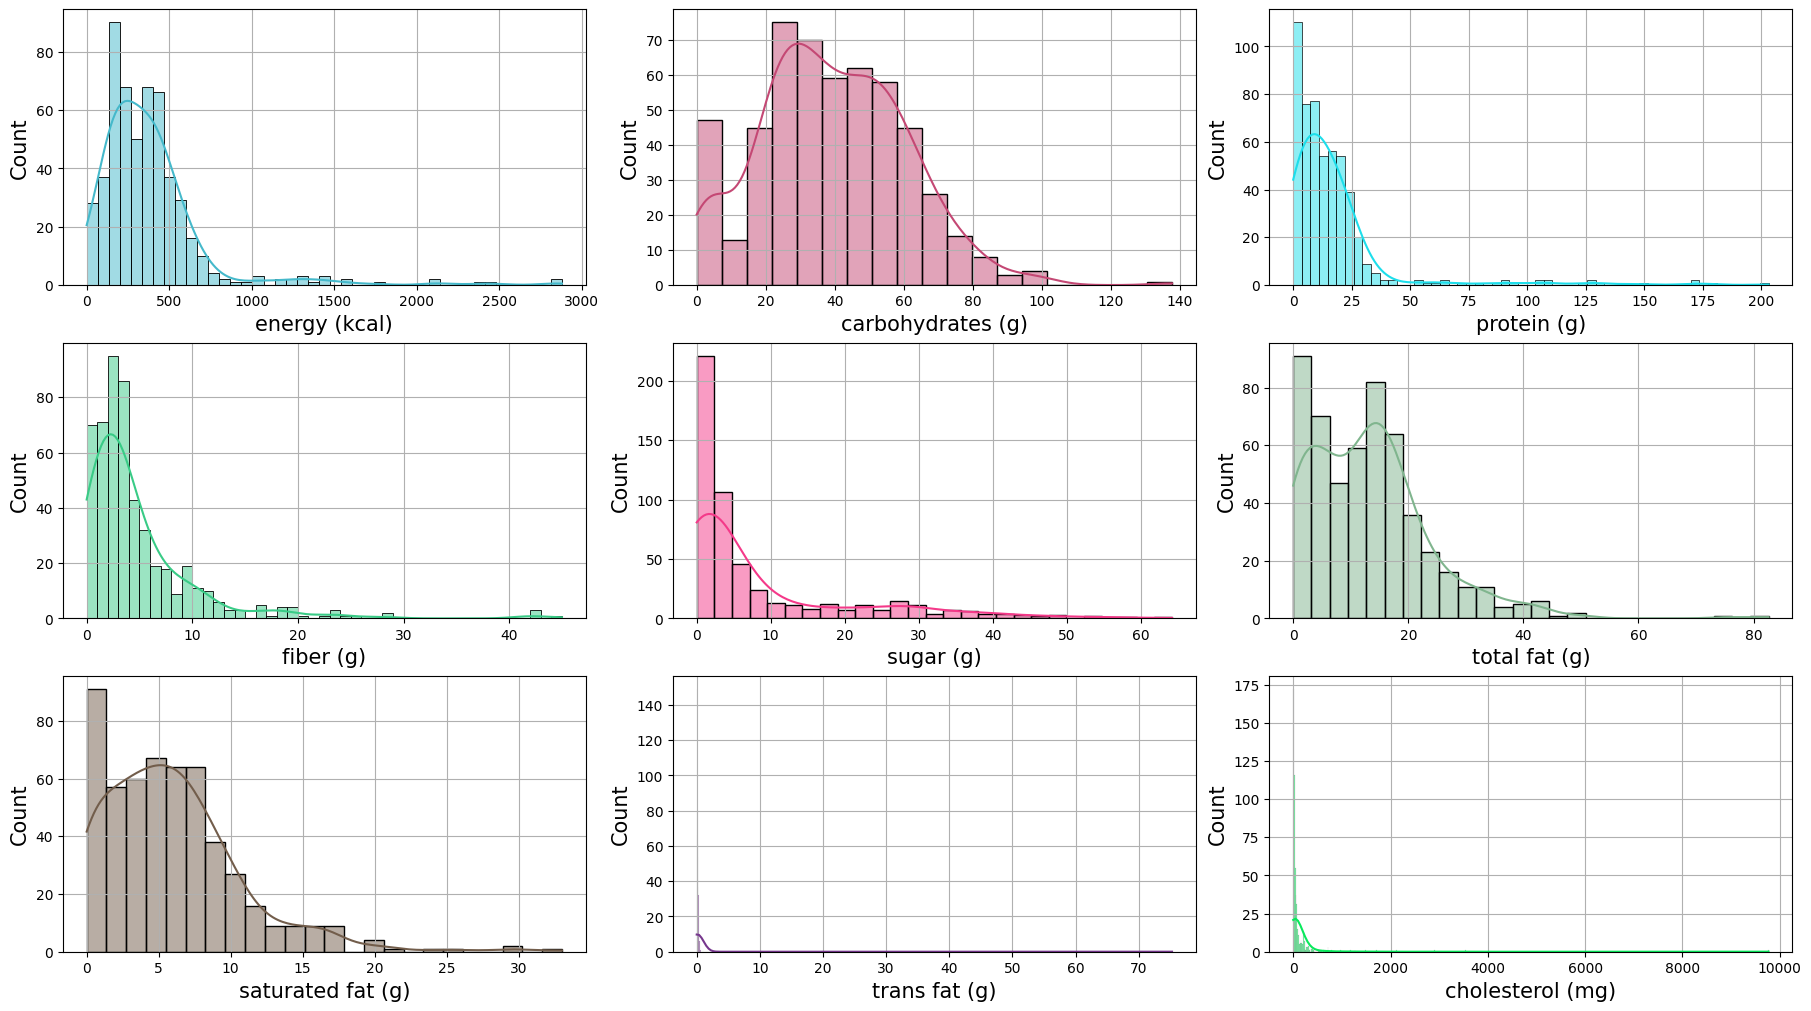

In [7]:
_, axes = plt.subplots(3, 3, constrained_layout=True)
for col, ax in zip(num_df.columns, axes.flatten()):
    sns.histplot(num_df[col], kde=True, color=np.random.rand(3), ax=ax)

Everything looks fine from the plot. \
A thing one can notice is that trans fat column has 75% of data at 0.2 while the max is at 75. There are clearly outliers. \
This charateristic is similar in cholesterol.
Let's try to understand better what happens in fiber column.

In [8]:
idx = num_df['fiber (g)'].argmax()
num_df.iloc[idx,:]

energy (kcal)        167.50
carbohydrates (g)      0.90
protein (g)           17.70
fiber (g)               inf
sugar (g)              0.00
total fat (g)         10.30
saturated fat (g)      4.00
trans fat (g)          0.00
cholesterol (mg)     182.31
Name: 166, dtype: float64

Let's drop this row

In [9]:
# Replace infinite updated data with nan
num_df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
num_df.dropna(inplace=True)

In [10]:
num_df

,energy (kcal),carbohydrates (g),protein (g),fiber (g),sugar (g),total fat (g),saturated fat (g),trans fat (g),cholesterol (mg)
0,432.60,65.64,17.91,3.85,0.0,10.93,5.14,0.16,16.19
1,407.60,67.11,16.73,7.19,0.0,8.03,3.24,0.11,66.80
2,423.33,59.97,18.26,3.49,0.0,12.27,5.23,0.18,19.75
3,474.03,52.86,20.07,3.79,0.0,20.26,9.25,0.33,71.72
4,408.16,53.93,19.91,2.46,0.0,12.53,4.90,0.14,48.09
...,...,...,...,...,...,...,...,...,...
525,352.90,24.50,35.30,5.76,10.4,12.60,4.80,0.19,308.70
526,461.20,51.30,26.70,5.16,3.6,13.90,4.30,0.17,713.07
527,667.50,17.30,19.20,16.92,10.6,31.30,14.10,0.56,541.49
528,322.60,34.20,9.30,5.40,3.9,16.50,4.50,0.18,564.30


There were 8 rows with inf values. \
Now let's drop outliers and see correlations beween features.

(477, 9)

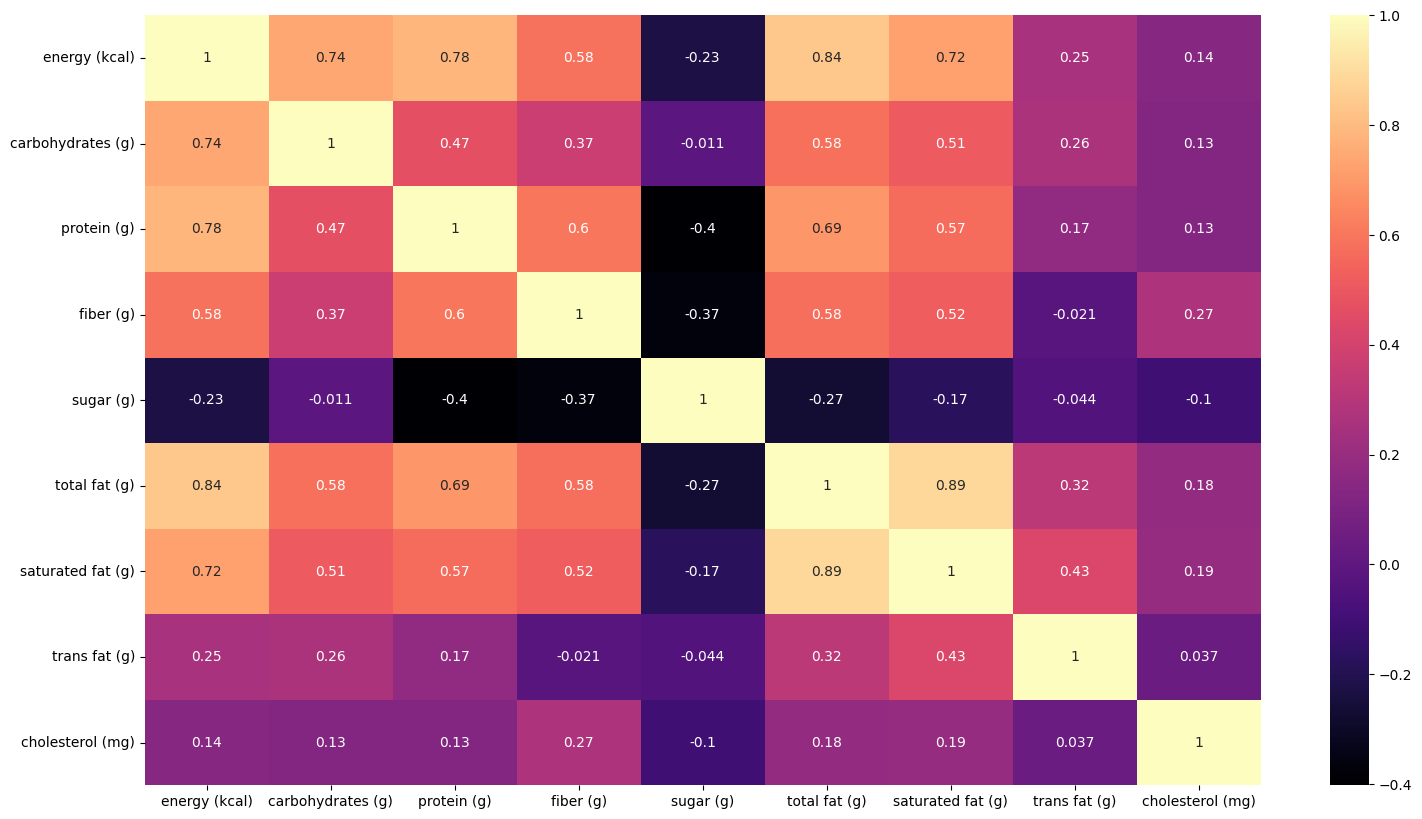

In [11]:
num_df_out = num_df[(np.abs(stats.zscore(num_df)) < 3).all(axis=1)]
sns.heatmap(num_df_out.corr(), annot=True, cmap='magma')
num_df_out.shape

Excluding outliers we dropped about 50 rows. \
There are some high correlations beetween features let's visualize these. \
For a better visualization let's scale data

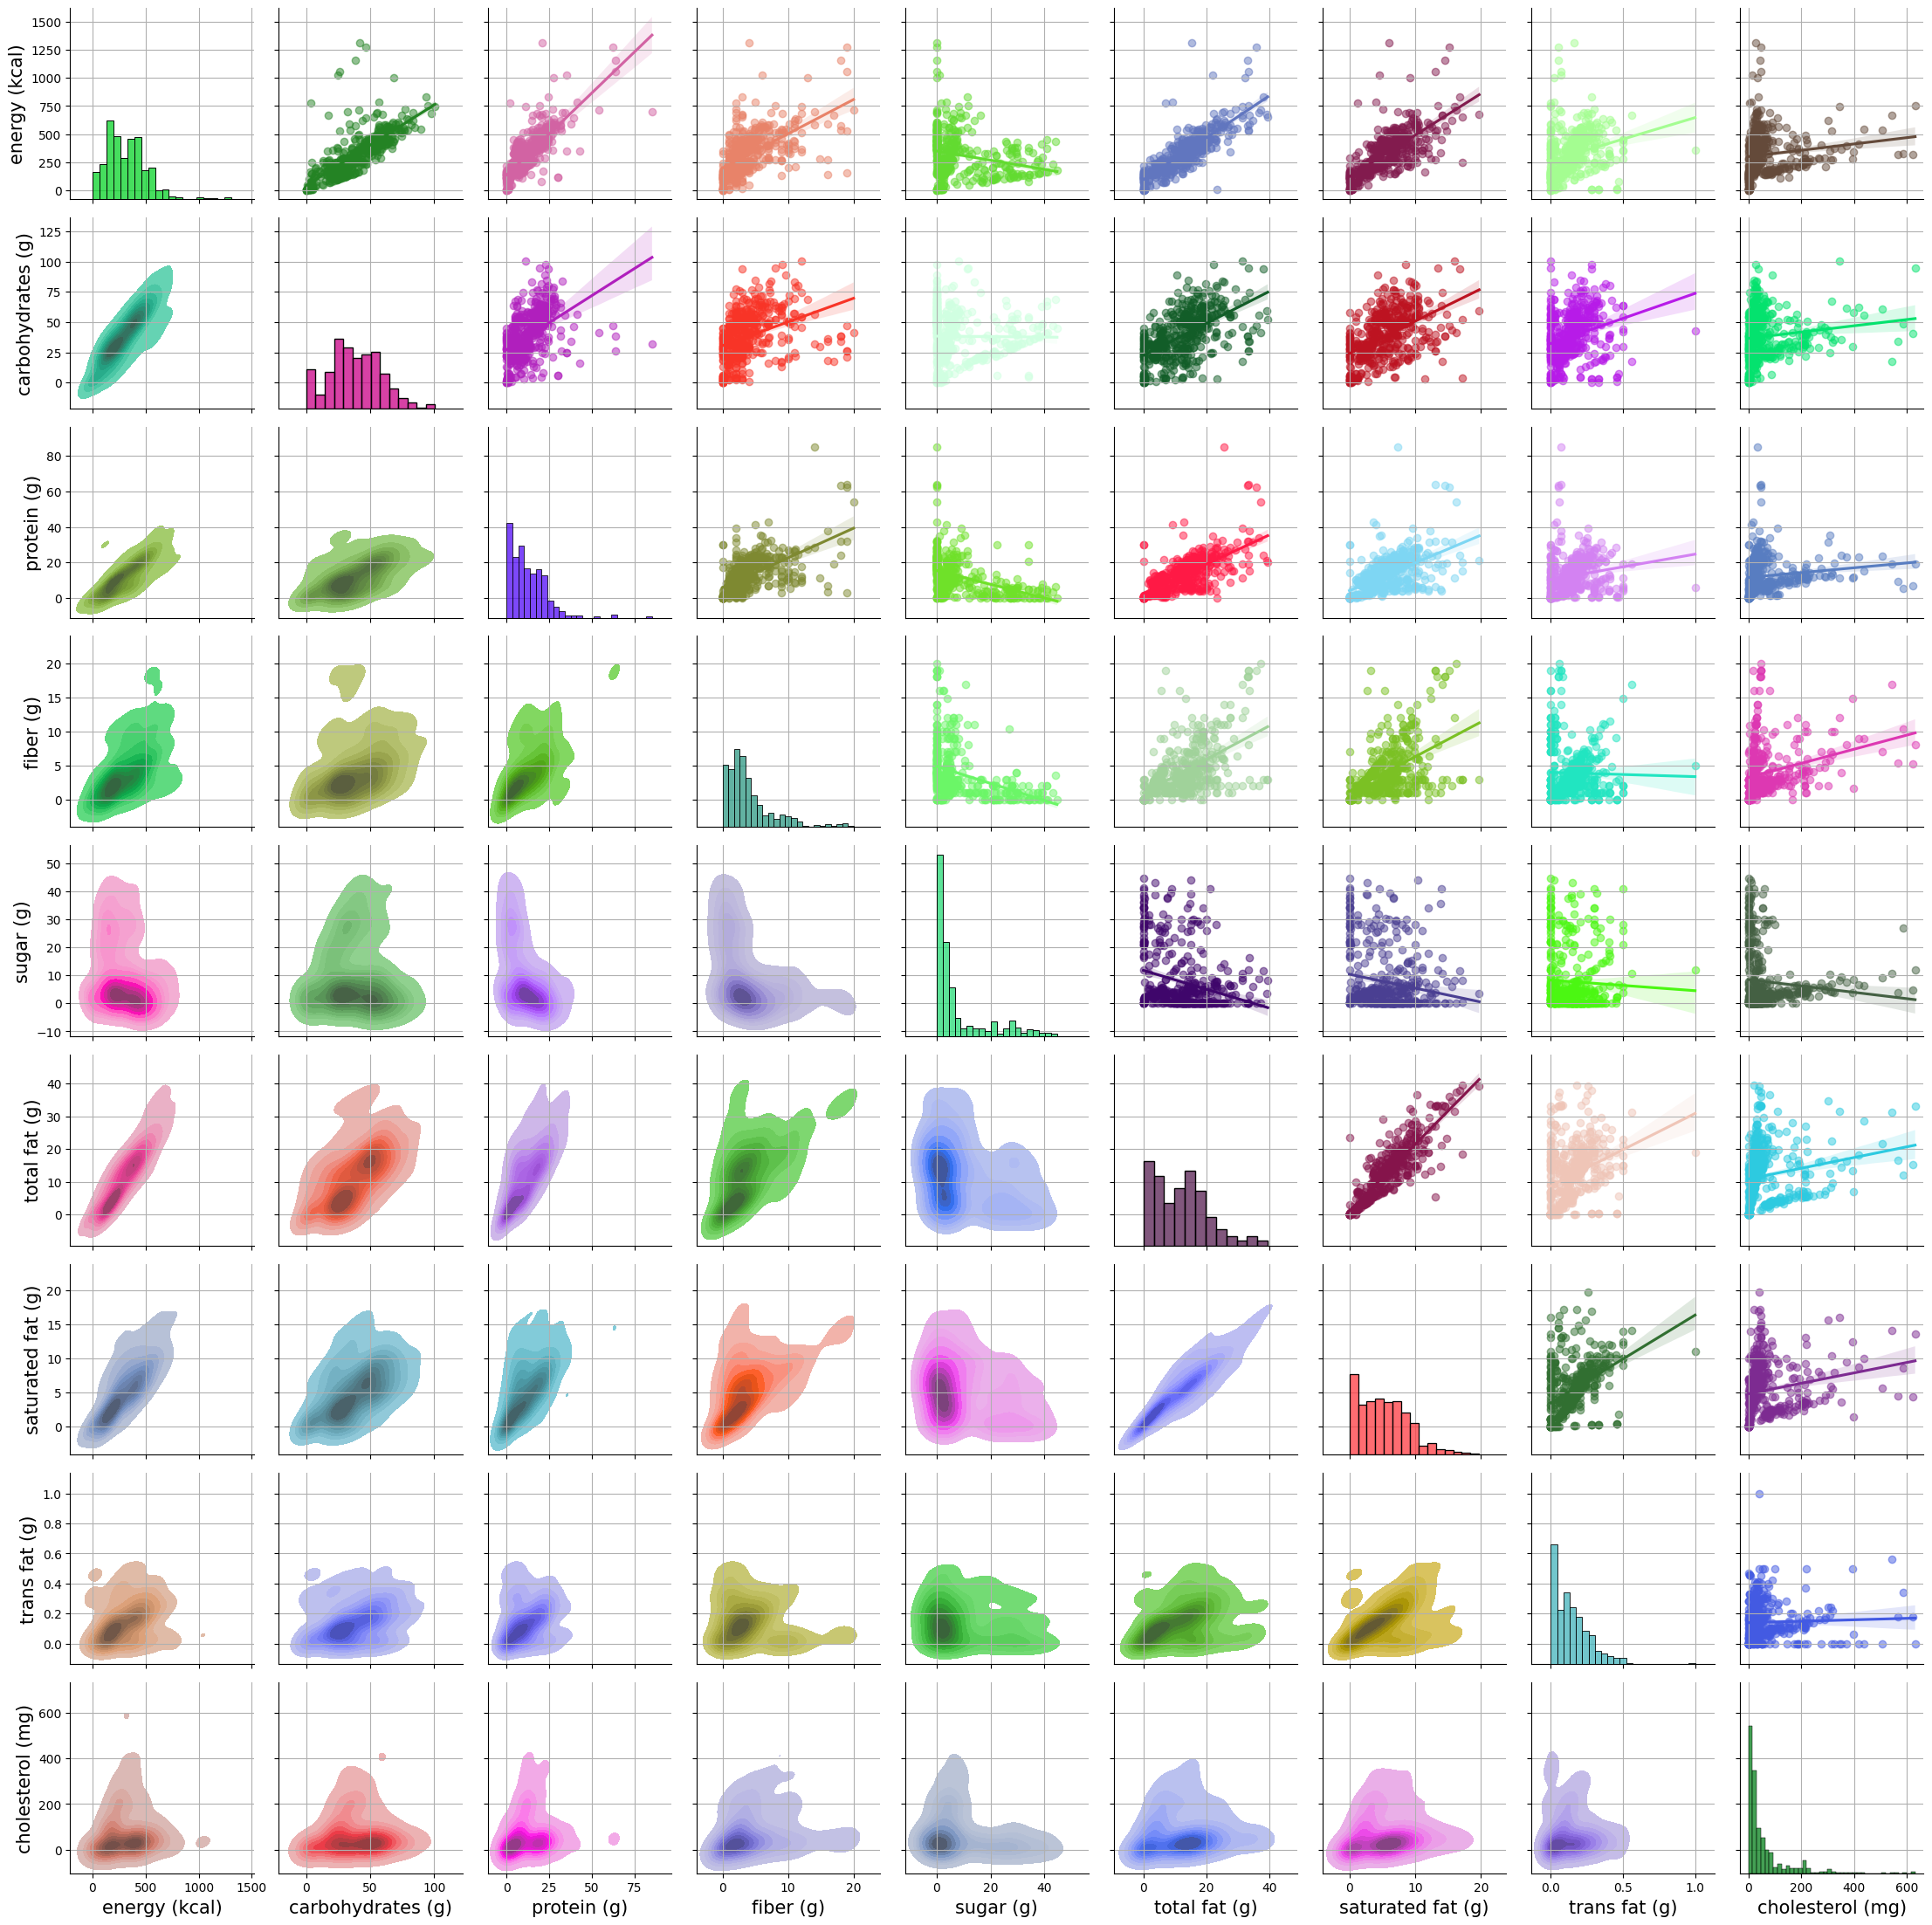

In [12]:
#Some cool settings
def my_regplot(x, y, **kwargs):
    kwargs['color'] = np.random.rand(3,)
    sns.regplot(x=x, y=y, scatter_kws={'alpha':0.5}, **kwargs)

def my_kde(x, y, **kwargs):
    kwargs['color'] = np.random.rand(3,)
    sns.kdeplot(x=x, y=y, fill = True,**kwargs)

def my_hist(x, **kwargs):
    kwargs['color'] = np.random.rand(3,)
    sns.histplot(x, **kwargs)

graph = sns.PairGrid(num_df_out)
graph.map_diag(my_hist)
graph.map_upper(my_regplot)
graph.map_lower(my_kde)

### Categorical features

In [13]:
cat_cols = data.select_dtypes(exclude=['float']).columns
cat_df = data.loc[:,cat_cols]
cat_df

,company,category,product,per serve size
0,pizza hut,all meals,corn n cheese (personal),143.5 g
1,pizza hut,all meals,country feast (personal),178 g
2,pizza hut,all meals,double cheese (personal),143 g
3,pizza hut,all meals,double paneer supreme (personal),174.5 g
4,pizza hut,all meals,farmer`s pick (personal),177 g
...,...,...,...,...
525,dominos,all meals,chicken wings,174.0
526,dominos,all meals,crispy chicken strips,156.0
527,dominos,all meals,zingy parcel chicken,210.0
528,dominos,all meals,taco mexicana - chicken,97.0


In [14]:
for col in cat_df.columns:
    print(cat_df[col].value_counts())

pizza hut      144
mcdonalds      140
dominos         87
kfc             72
starbucks       46
burger king     41
Name: company, dtype: int64
all meals                           344
mccafe menu                          60
regular menu                         36
gourmet menu                         17
hot breakfast                        12
desserts menu                        10
cookies, brownies & bars              9
croissants, danishes & bagels         9
condiments menu                       9
breakfast menu                        8
loaves, coffee cakes & cake pops      7
seasonal bakery offerings             6
fruit & yogurt                        3
Name: category, dtype: int64
medium fries                  3
corn n cheese (personal)      2
veggie lover (medium)         2
chicken supreme (medium)      2
chicken sausage (medium)      2
                             ..
spicy chicken wrap            1
mc spicy chicken burger       1
fillet-o-fish burger          1
mc chicken burger    

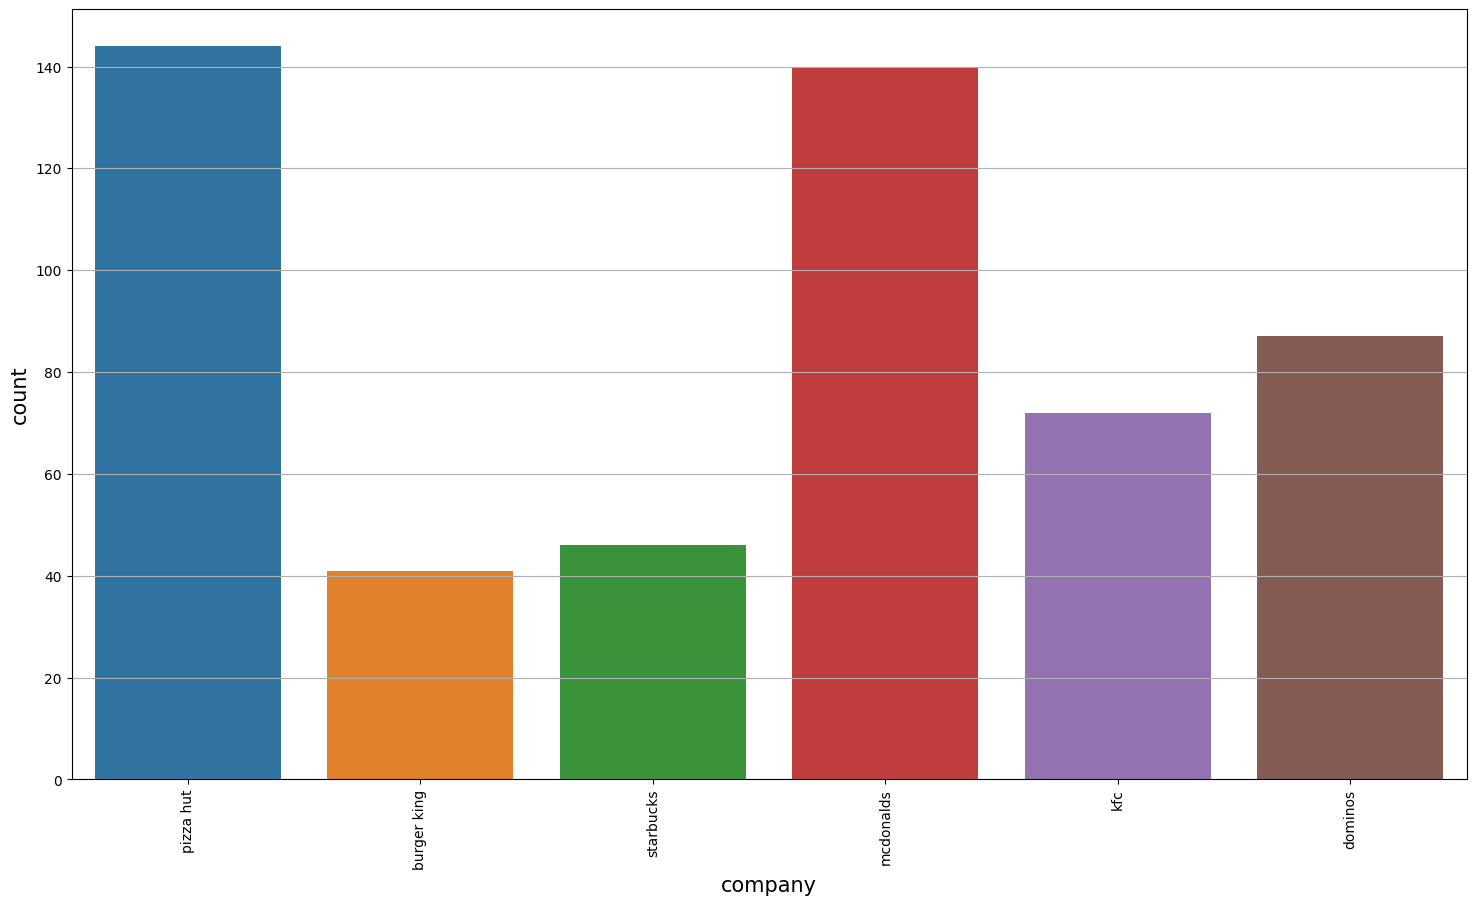

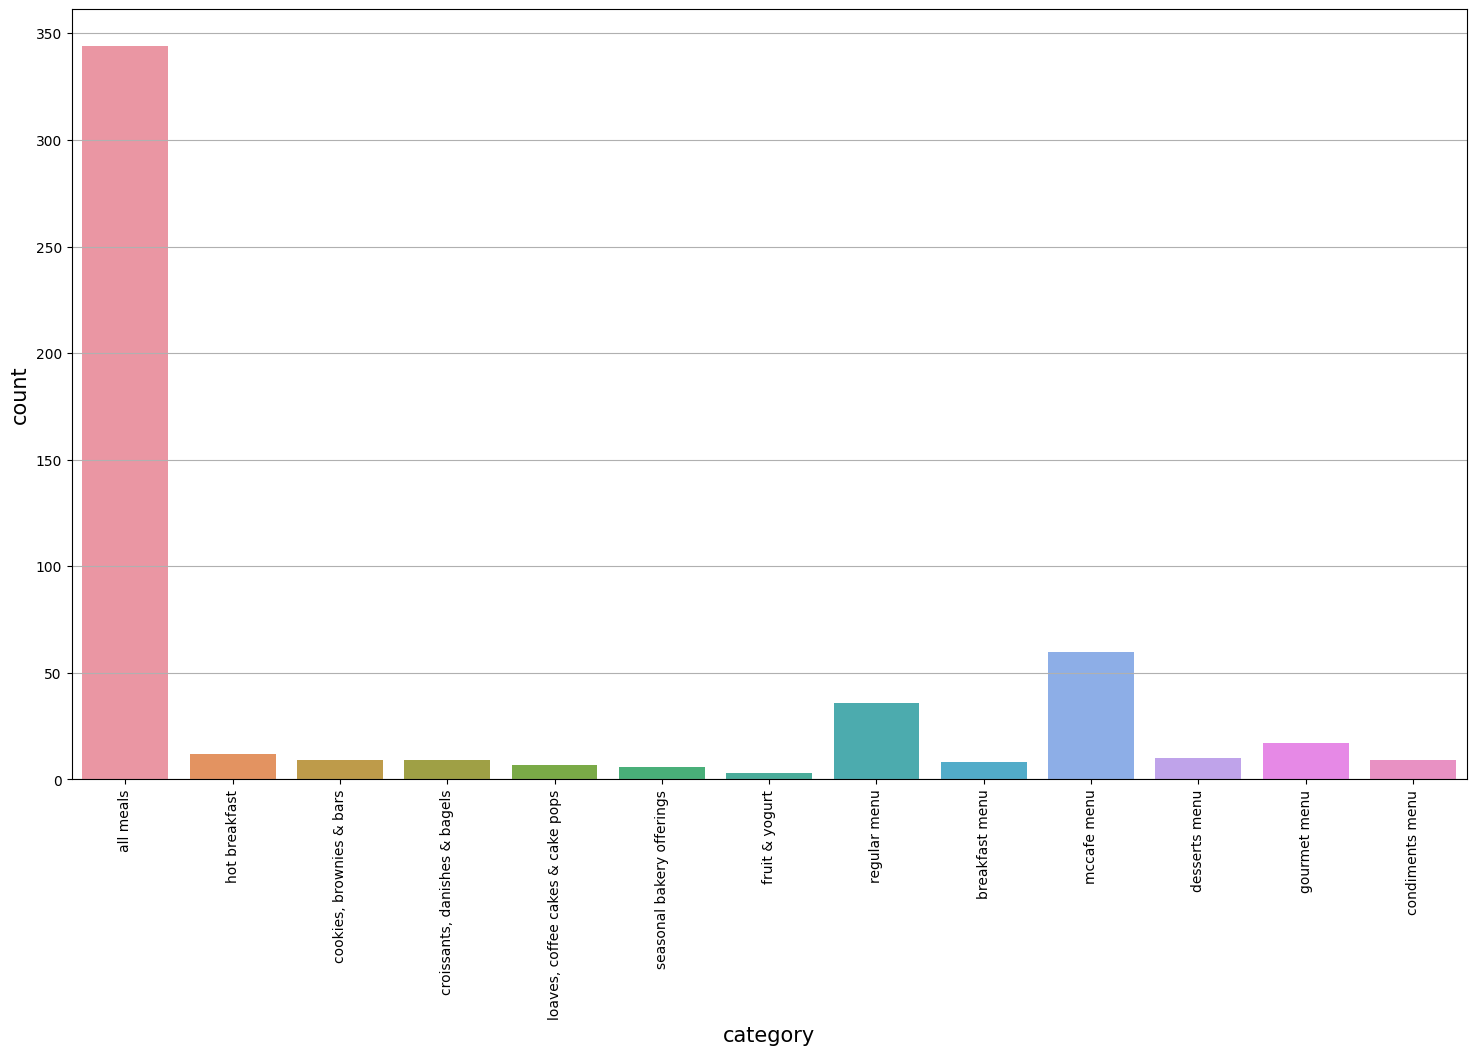

) missing from current font.s\py10\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


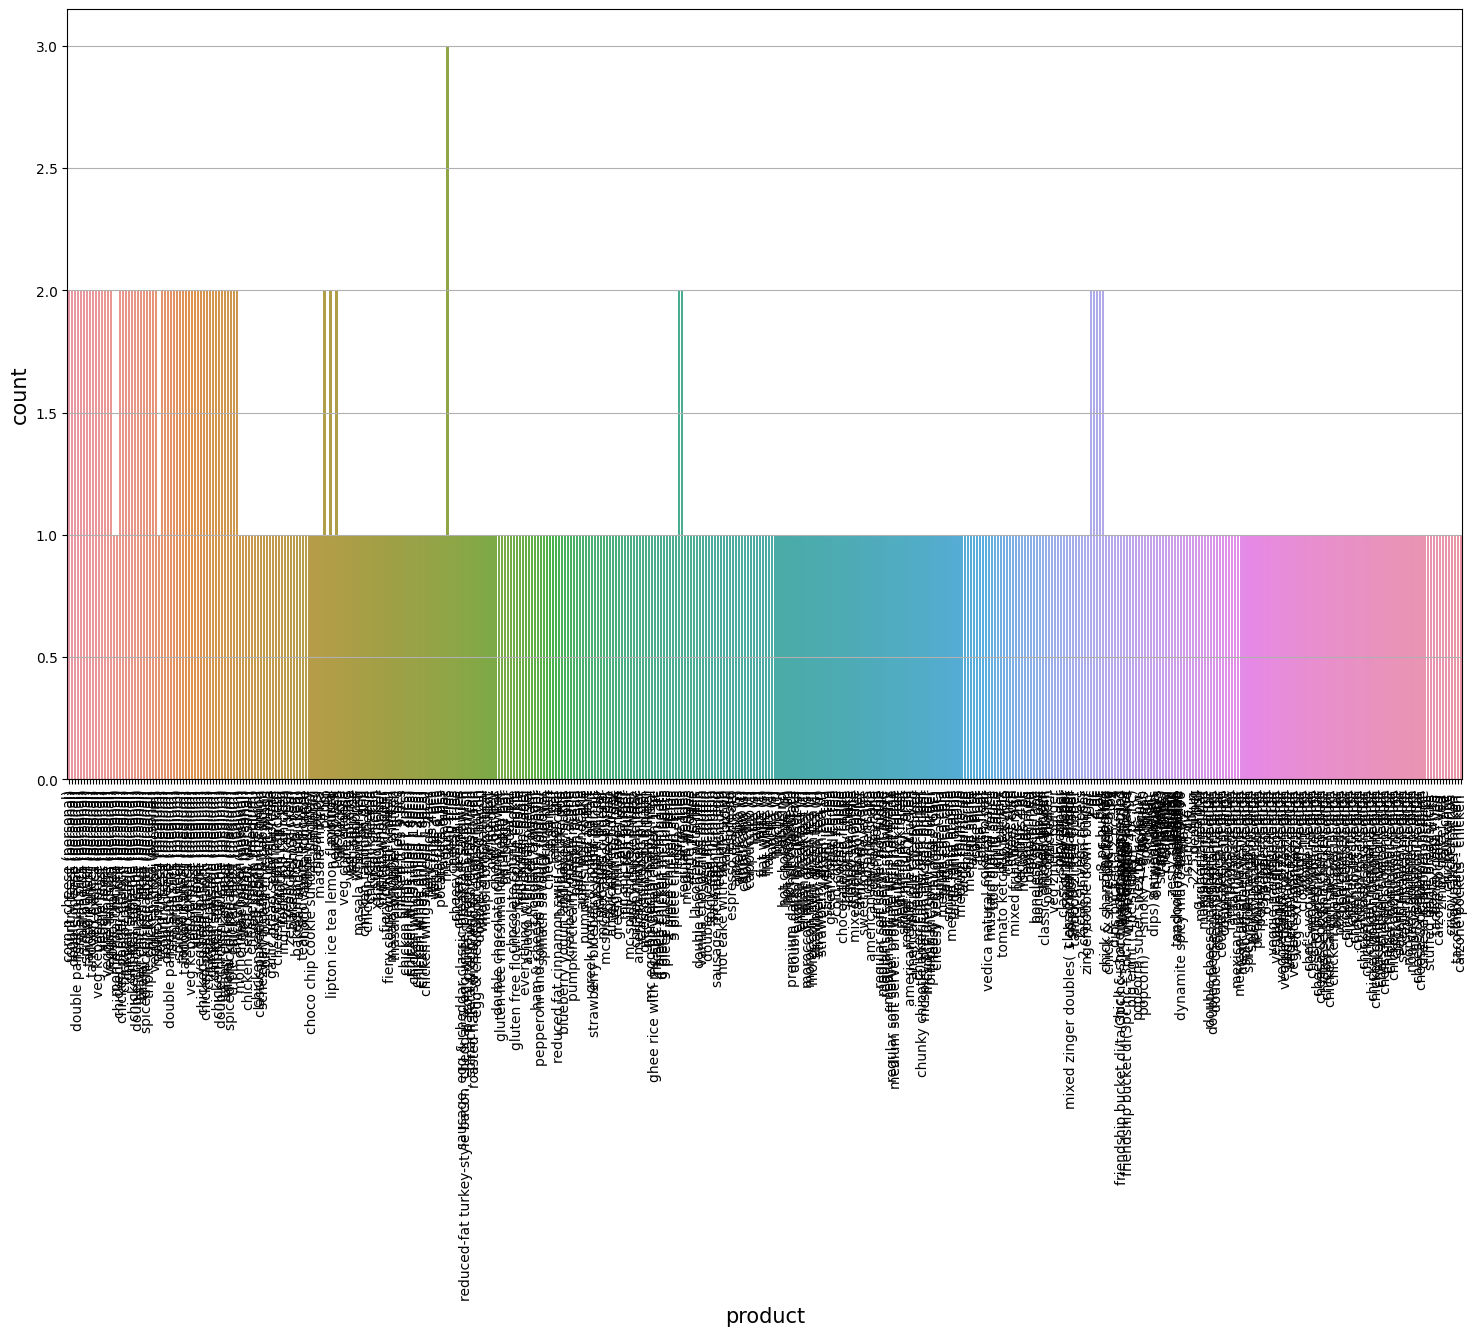

In [15]:
for col in cat_df.columns[:-1]:
    sns.countplot(data=cat_df, x=col)
    plt.xticks(rotation=90)
    plt.show()

Now let's try to put all together and try to have a better insight